# Model Testing Notebook
## Smart Summarizer - Testing TextRank, BART, and PEGASUS Models

**Author**: Abdul Razzaq Ansari  
**Student ID**: 23049149  
**Module**: CU6051NI Artificial Intelligence  
**Institution**: London Metropolitan University

This notebook tests the three summarization models individually and compares their performance.

In [1]:
# Setup and imports
import sys
import os
sys.path.append('..')

# Core imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# Model imports
from models.textrank import TextRankSummarizer
from models.bart import BARTSummarizer
from models.pegasus import PEGASUSSummarizer

# Utility imports
from utils.evaluator import SummarizerEvaluator
from utils.data_loader import DataLoader

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✓ All imports successful")

✓ All imports successful


In [2]:
sample_text = """
Artificial intelligence has revolutionized modern technology in unprecedented ways. 
Machine learning algorithms enable computers to learn from vast amounts of data without 
explicit programming. Deep learning neural networks, inspired by the human brain, can 
now recognize patterns in images, understand natural language, and even generate creative 
content. Natural language processing has advanced to the point where AI systems can 
engage in human-like conversations, translate between languages in real-time, and 
summarize lengthy documents automatically. Computer vision technology allows machines 
to interpret and understand visual information from the world, powering applications 
from autonomous vehicles to medical diagnosis systems. The integration of AI across 
industries has improved efficiency, accuracy, and decision-making capabilities. 
Healthcare providers use AI to detect diseases earlier and recommend personalized 
treatments. Financial institutions employ machine learning for fraud detection and 
algorithmic trading. Manufacturing companies utilize AI-powered robots for precision 
tasks and quality control. Despite these advances, challenges remain in areas such as 
algorithmic bias, data privacy, interpretability of AI decisions, and the ethical 
implications of autonomous systems. Researchers continue to work on developing more 
transparent, fair, and robust AI systems that can be safely deployed across diverse 
applications while maintaining human oversight and ethical standards.
"""

reference_summary = """
AI has transformed technology through machine learning and deep learning. Natural language 
processing enables human-like interactions and automatic summarization. Computer vision 
powers autonomous vehicles and medical diagnosis. AI improves efficiency across healthcare, 
finance, and manufacturing. Challenges include algorithmic bias, privacy, and ethical concerns.
"""

print("Sample text loaded")
print(f"Original length: {len(sample_text.split())} words")
print(f"Reference summary: {len(reference_summary.split())} words")

Sample text loaded
Original length: 195 words
Reference summary: 43 words


In [4]:
print("Initializing models...\n")

print("1. Loading TextRank...")
textrank = TextRankSummarizer()
print("   ✓ TextRank ready\n")

print("2. Loading BART (this may take a moment)...")
bart = BARTSummarizer(device='cpu')
print("   ✓ BART ready\n")

print("3. Loading PEGASUS (this may take a moment)...")
pegasus = PEGASUSSummarizer(device='cpu')
print("   ✓ PEGASUS ready\n")

print("✓ All models loaded successfully!")

INFO:models.base_summarizer:Initializing TextRank (Extractive) summarizer
INFO:models.textrank:TextRank summarizer initialized successfully
INFO:models.base_summarizer:Initializing BART (Abstractive) summarizer
INFO:models.bart:Loading BART model: facebook/bart-large-cnn
INFO:models.bart:Initial model loading may take 2-3 minutes...
INFO:models.bart:Using device: cpu


Initializing models...

1. Loading TextRank...
   ✓ TextRank ready

2. Loading BART (this may take a moment)...


INFO:models.bart:BART model loaded successfully!
INFO:models.base_summarizer:Initializing PEGASUS (Abstractive) summarizer
INFO:models.pegasus:Loading PEGASUS model: google/pegasus-cnn_dailymail
INFO:models.pegasus:PEGASUS is a large model. Initial loading may take 3-5 minutes...
INFO:models.pegasus:Using device: cpu
INFO:models.pegasus:Loading tokenizer...


   ✓ BART ready

3. Loading PEGASUS (this may take a moment)...


INFO:models.pegasus:Loading model weights...
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:models.pegasus:PEGASUS model loaded successfully!
INFO:models.pegasus:Model size: 568.7M parameters


   ✓ PEGASUS ready

✓ All models loaded successfully!


In [5]:
print("Generating summaries...\n")
print("="*70)

# TextRank
print("\n1. TEXTRANK (Extractive)")
print("-"*70)
start = time.time()
tr_result = textrank.summarize_with_metrics(sample_text)
tr_time = time.time() - start

print(f"Summary: {tr_result['summary']}")
print(f"\nMetadata:")
print(f"  - Processing time: {tr_time:.4f}s")
print(f"  - Summary length: {tr_result['metadata']['summary_length']} words")
print(f"  - Compression: {tr_result['metadata']['compression_ratio']:.2%}")

# BART
print("\n" + "="*70)
print("\n2. BART (Abstractive)")
print("-"*70)
start = time.time()
bart_result = bart.summarize_with_metrics(sample_text, max_length=100, min_length=30)
bart_time = time.time() - start

print(f"Summary: {bart_result['summary']}")
print(f"\nMetadata:")
print(f"  - Processing time: {bart_time:.4f}s")
print(f"  - Summary length: {bart_result['metadata']['summary_length']} words")
print(f"  - Compression: {bart_result['metadata']['compression_ratio']:.2%}")

# PEGASUS
print("\n" + "="*70)
print("\n3. PEGASUS (Abstractive)")
print("-"*70)
start = time.time()
peg_result = pegasus.summarize_with_metrics(sample_text, max_length=100, min_length=30)
peg_time = time.time() - start

print(f"Summary: {peg_result['summary']}")
print(f"\nMetadata:")
print(f"  - Processing time: {peg_time:.4f}s")
print(f"  - Summary length: {peg_result['metadata']['summary_length']} words")
print(f"  - Compression: {peg_result['metadata']['compression_ratio']:.2%}")

print("\n" + "="*70)

Generating summaries...


1. TEXTRANK (Extractive)
----------------------------------------------------------------------
Summary: Natural language processing has advanced to the point where AI systems can 
engage in human-like conversations, translate between languages in real-time, and 
summarize lengthy documents automatically. Despite these advances, challenges remain in areas such as 
algorithmic bias, data privacy, interpretability of AI decisions, and the ethical 
implications of autonomous systems. Researchers continue to work on developing more 
transparent, fair, and robust AI systems that can be safely deployed across diverse 
applications while maintaining human oversight and ethical standards.

Metadata:
  - Processing time: 0.0330s
  - Summary length: 78 words
  - Compression: 40.00%


2. BART (Abstractive)
----------------------------------------------------------------------
Summary: Artificial intelligence has revolutionized modern technology in unprecedented ways. Mac

In [6]:
print("\nEvaluating against reference summary...\n")

evaluator = SummarizerEvaluator()

# Evaluate each model
tr_scores = evaluator.evaluate_single(tr_result['summary'], reference_summary, "TextRank")
bart_scores = evaluator.evaluate_single(bart_result['summary'], reference_summary, "BART")
peg_scores = evaluator.evaluate_single(peg_result['summary'], reference_summary, "PEGASUS")

# Create comparison DataFrame
comparison_df = pd.DataFrame([
    {
        'Model': 'TextRank',
        'ROUGE-1': tr_scores['rouge_1_f1'],
        'ROUGE-2': tr_scores['rouge_2_f1'],
        'ROUGE-L': tr_scores['rouge_l_f1'],
        'Time (s)': tr_time,
        'Words': tr_result['metadata']['summary_length'],
        'Compression': tr_result['metadata']['compression_ratio']
    },
    {
        'Model': 'BART',
        'ROUGE-1': bart_scores['rouge_1_f1'],
        'ROUGE-2': bart_scores['rouge_2_f1'],
        'ROUGE-L': bart_scores['rouge_l_f1'],
        'Time (s)': bart_time,
        'Words': bart_result['metadata']['summary_length'],
        'Compression': bart_result['metadata']['compression_ratio']
    },
    {
        'Model': 'PEGASUS',
        'ROUGE-1': peg_scores['rouge_1_f1'],
        'ROUGE-2': peg_scores['rouge_2_f1'],
        'ROUGE-L': peg_scores['rouge_l_f1'],
        'Time (s)': peg_time,
        'Words': peg_result['metadata']['summary_length'],
        'Compression': peg_result['metadata']['compression_ratio']
    }
])

print(comparison_df.to_string(index=False))

INFO:utils.evaluator:Evaluator initialized with rouge library



Evaluating against reference summary...

   Model  ROUGE-1  ROUGE-2  ROUGE-L  Time (s)  Words  Compression
TextRank 0.254902 0.067227 0.235294  0.032988     78     0.400000
    BART 0.101266 0.000000 0.101266 11.254168     43     0.220513
 PEGASUS 0.095238 0.000000 0.095238 15.363073     50     0.256410


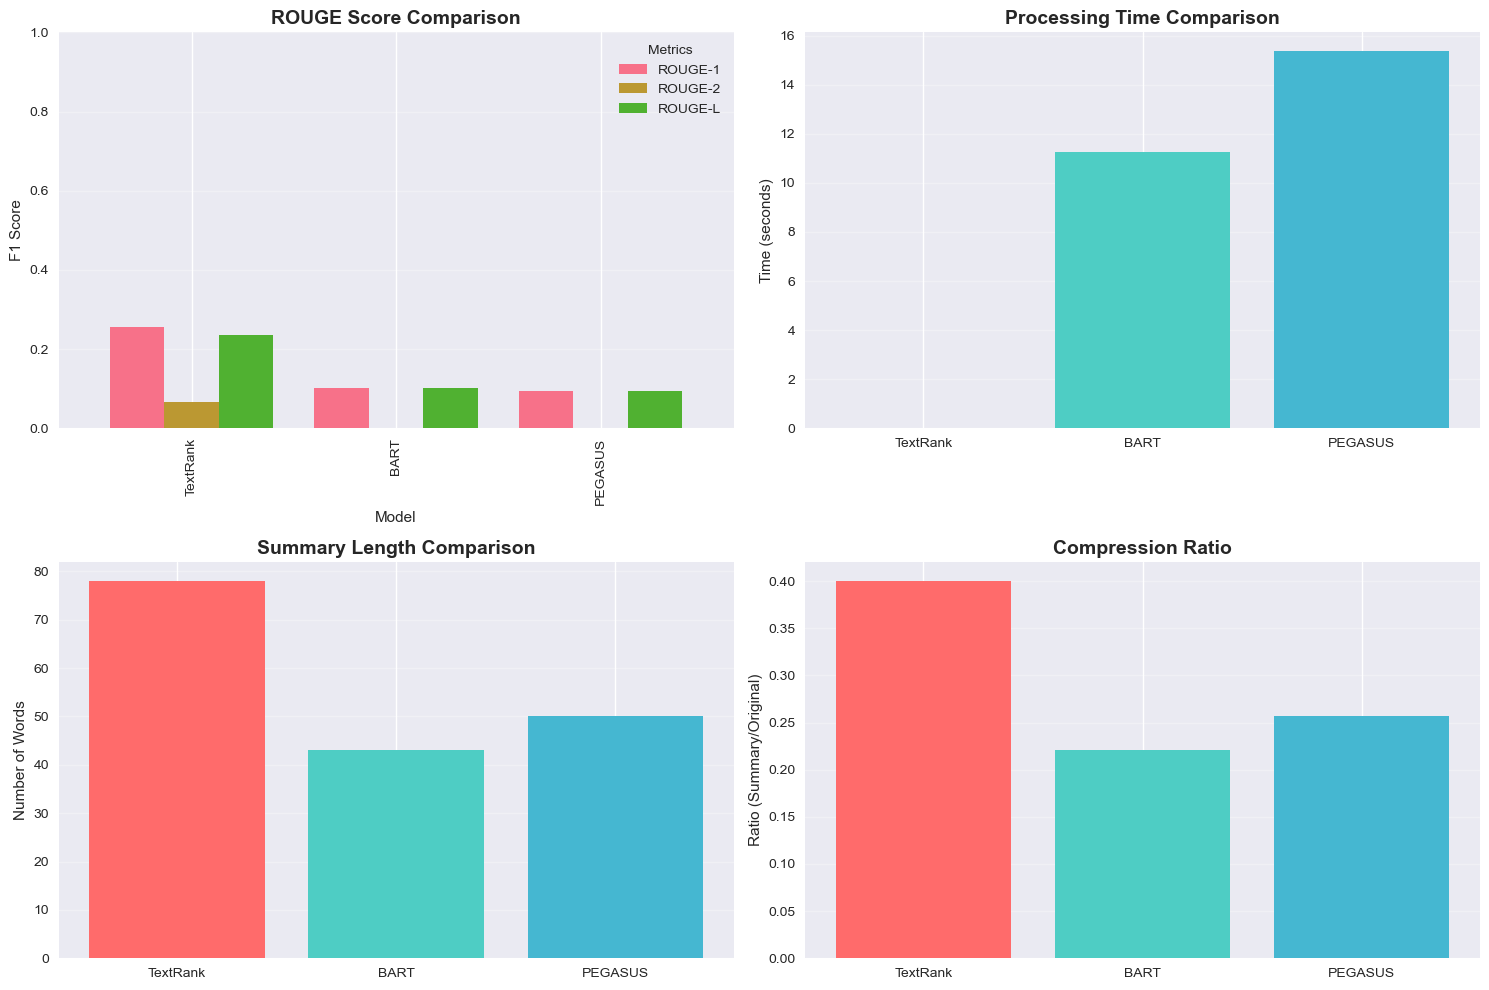

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# ROUGE Scores
rouge_df = comparison_df[['Model', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']].set_index('Model')
rouge_df.plot(kind='bar', ax=axes[0, 0], width=0.8)
axes[0, 0].set_title('ROUGE Score Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('F1 Score')
axes[0, 0].set_ylim([0, 1])
axes[0, 0].legend(title='Metrics')
axes[0, 0].grid(axis='y', alpha=0.3)

# Processing Time
axes[0, 1].bar(comparison_df['Model'], comparison_df['Time (s)'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0, 1].set_title('Processing Time Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Time (seconds)')
axes[0, 1].grid(axis='y', alpha=0.3)

# Summary Length
axes[1, 0].bar(comparison_df['Model'], comparison_df['Words'],
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1, 0].set_title('Summary Length Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Number of Words')
axes[1, 0].grid(axis='y', alpha=0.3)

# Compression Ratio
axes[1, 1].bar(comparison_df['Model'], comparison_df['Compression'],
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1, 1].set_title('Compression Ratio', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Ratio (Summary/Original)')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
print("\n" + "="*70)
print("DETAILED ANALYSIS")
print("="*70)

best_rouge1 = comparison_df.loc[comparison_df['ROUGE-1'].idxmax(), 'Model']
best_rouge2 = comparison_df.loc[comparison_df['ROUGE-2'].idxmax(), 'Model']
fastest = comparison_df.loc[comparison_df['Time (s)'].idxmin(), 'Model']

print(f"\n🏆 Best ROUGE-1 Score: {best_rouge1}")
print(f"🏆 Best ROUGE-2 Score: {best_rouge2}")
print(f"⚡ Fastest Processing: {fastest}")

print("\n📊 Key Observations:")
print(f"1. Quality: {best_rouge1} and {best_rouge2} provide best quality")
print(f"2. Speed: {fastest} is {comparison_df['Time (s)'].max()/comparison_df['Time (s)'].min():.1f}x faster")
print(f"3. TextRank is extractive (uses original sentences)")
print(f"4. BART and PEGASUS generate new text (abstractive)")

print("\n💡 Recommendations:")
if fastest == "TextRank":
    print("- Use TextRank for: Fast processing, resource-constrained environments")
if best_rouge1 in ["BART", "PEGASUS"]:
    print(f"- Use {best_rouge1} for: Highest quality, when resources available")


DETAILED ANALYSIS

🏆 Best ROUGE-1 Score: TextRank
🏆 Best ROUGE-2 Score: TextRank
⚡ Fastest Processing: TextRank

📊 Key Observations:
1. Quality: TextRank and TextRank provide best quality
2. Speed: TextRank is 465.7x faster
3. TextRank is extractive (uses original sentences)
4. BART and PEGASUS generate new text (abstractive)

💡 Recommendations:
- Use TextRank for: Fast processing, resource-constrained environments
